In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mnist = loadmat("mnist-original.mat")

In [4]:
mnist = {
        "data": mnist["data"].T,
        "target": mnist["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

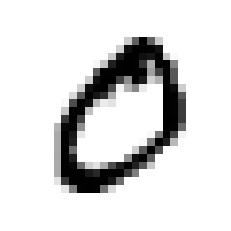

In [8]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [9]:
y[0]

0.0

In [15]:
#Train-test split. 
#By default MNIST is divided into train-test.
#First 60,000 train, rest 10,000 test

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [20]:
#Using Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(random_state=42)

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.98015, 0.95615, 0.9706 ])

In [28]:
from sklearn.base import BaseEstimator

class Never0Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [30]:
never_0_clf = Never0Classifier()
cross_val_score(never_0_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.70385, 1.     , 1.     ])

In [31]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0, y_train_pred)

array([[52482,  1595],
       [  267,  5656]], dtype=int64)

In [33]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_0, y_train_pred)

0.78003034064267

The model is correct 78% of the time when it claims a number is 0

In [34]:
recall_score(y_train_0, y_train_pred)

0.9549214924869154

The model detects 95% of the total number of 0s

In [35]:
#Using F1 score (harmonic mean of Precision and Recall)

from sklearn.metrics import f1_score

f1_score(y_train_0, y_train_pred)

0.8586609989373006

In [36]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method="decision_function")

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

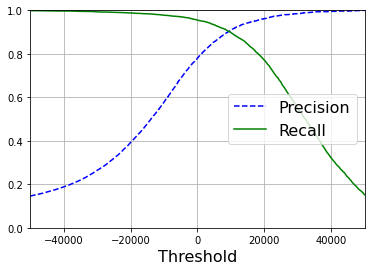

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                            
    plt.axis([-50000, 50000, 0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()    

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_0, y_scores)

0.9910680354987216

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3, method="predict_proba")

In [41]:
y_probas_forest

array([[0.  , 1.  ],
       [0.04, 0.96],
       [0.15, 0.85],
       ...,
       [0.93, 0.07],
       [0.97, 0.03],
       [0.96, 0.04]])

In [42]:
from sklearn.metrics import roc_curve

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_scores_forest) 

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)  

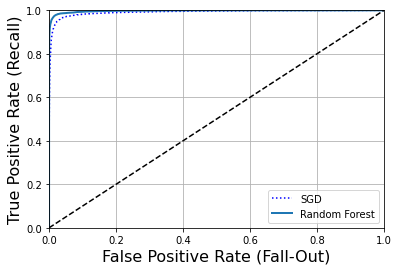

In [45]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores) 

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [46]:
roc_auc_score(y_train_0, y_scores_forest)

0.9975104189747056